In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
liverD = pd.read_excel('./dot_under_0.2/NFRP_liver_decoy.xlsx')
liverD.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,Adult_Liver_bRP_Elite_82_f01.00156.00156.2,1,TGGSTVLVVRK/2,0.138,0.010,[2],0,0.000,47,0.060,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9HAB8|PPCS_HUMAN(pre=R,post=V)",634685361
1,Adult_Liver_bRP_Elite_82_f01.00171.00171.2,1,EFVSEQAQALMMK/2,0.185,0.002,[2],0,-0.005,53,0.054,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8IUC4|RHPN2_HUMAN(pre=K,post=I)",566374719
2,Adult_Liver_bRP_Elite_82_f01.00177.00177.2,1,FVTSFVVTVK/2,0.178,0.028,[2],0,0.001,55,0.064,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O15144|ARPC2_HUMAN(pre=R,post=D)",727815122
3,Adult_Liver_bRP_Elite_82_f01.00178.00178.3,1,SNASEYMDGEVKR/3,0.112,0.004,[2],0,-0.003,15,0.058,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q92793|CBP_HUMAN(pre=K,post=D)",510211019
4,Adult_Liver_bRP_Elite_82_f01.00311.00311.2,1,EASVVLILVK/2,0.155,0.025,[2],0,-0.005,31,0.061,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P53602|MVD1_HUMAN(pre=R,post=K)",714688891


In [3]:
liverD1 = liverD.loc[:, ['ID']]
liverD1.head()

,ID
0,TGGSTVLVVRK/2
1,EFVSEQAQALMMK/2
2,FVTSFVVTVK/2
3,SNASEYMDGEVKR/3
4,EASVVLILVK/2


In [4]:
liverd1 = liverD1.values.tolist()
liverd1 = np.concatenate(liverd1).tolist()
liverd1

['TGGSTVLVVRK/2',
 'EFVSEQAQALMMK/2',
 'FVTSFVVTVK/2',
 'SNASEYMDGEVKR/3',
 'EASVVLILVK/2',
 'LAAVQLLITTK/2',
 'YPGYSSSQGSGSGHR/3',
 'YAVPLHQIGK/2',
 'LLVTSLISFLR/2',
 'IALLLFPKK/2',
 'ELQTLINHVVR/2',
 'VLNHLNQALIK/2',
 'AGLLALEVAVR/2',
 'SNASEYMDGEVKR/3',
 'IEGIGVNIKK/2',
 'LLGGLEAAQGTK/2',
 'AAIHLAPLRVR/2',
 'GLLVISNLVK/2',
 'IGLQALEVIR/2',
 'TPQLGVAEGIR/2',
 'AGLLALEVAVR/2',
 'FINLVPLIQK/2',
 'EASVVLILVK/2',
 'PILTGLEKIK/2',
 'SPRESLPLMK/2',
 'IWPLFHSVK/2',
 'EIAELLVKR/2',
 'EASVVLILVK/2',
 'ALQLAQELTR/2',
 'LVAIEQVTIAK/2',
 'PGTILQTLVK/2',
 'PPVLLAARR/2',
 'IIITGLSGVFK/2',
 'EDPAADAK/2',
 'PEPRPELR/3',
 'SGAAGAQR/2',
 'LHFQHEYDR/3',
 'HNGAEIYMR/3',
 'SGFGGLK/2',
 'GDQADPSMSHSLRSH/3',
 'LGPQDWSYWPDR/3',
 'QSTPSVDVHQGSSDR/3',
 'LSSLEMYATSTSR/3',
 'DTQGYHSGQGQR/3',
 'SDGQGESGTHLR/3',
 'AFNDEGNHDPSR/3',
 'PAPLHPIIK/3',
 'GSAAINK/2',
 'PQHLSILVLR/3',
 'HSGPFQR/2',
 'ELHEEYHFHR/4',
 'QFGGGTR/2',
 'GHYYGGEYPTMEPGK/3',
 'EDWDEPKR/3',
 'LEPHIHR/3',
 'SFVGIKK/2',
 'GSFDGGMTHTK/3',
 'EKLAGEVT

In [5]:
seq_len = []
for i in liverd1:
    seq_len.append(len(i) - 2)
seq_len

[11,
 13,
 10,
 13,
 10,
 11,
 15,
 10,
 11,
 9,
 11,
 11,
 11,
 13,
 10,
 12,
 11,
 10,
 10,
 11,
 11,
 10,
 10,
 10,
 10,
 9,
 9,
 10,
 10,
 11,
 10,
 9,
 11,
 8,
 8,
 8,
 9,
 9,
 7,
 15,
 12,
 15,
 13,
 12,
 12,
 12,
 9,
 7,
 10,
 7,
 10,
 7,
 15,
 8,
 7,
 7,
 11,
 9,
 10,
 8,
 10,
 7,
 7,
 8,
 7,
 9,
 9,
 15,
 7,
 10,
 7,
 7,
 8,
 8,
 7,
 11,
 7,
 7,
 11,
 10,
 11,
 8,
 7,
 13,
 11,
 9,
 8,
 8,
 10,
 7,
 13,
 7,
 9,
 11,
 14,
 9,
 10,
 11,
 8,
 10,
 8,
 7,
 7,
 11,
 7,
 9,
 8,
 7,
 12,
 7,
 7,
 9,
 14,
 13,
 8,
 8,
 8,
 10,
 7,
 7,
 16,
 7,
 8,
 8,
 6,
 7,
 7,
 11,
 19,
 18,
 8,
 8,
 14,
 7,
 13,
 7,
 13,
 7,
 7,
 13,
 9,
 13,
 8,
 7,
 7,
 9,
 12,
 7,
 10,
 11,
 11,
 10,
 7,
 7,
 10,
 7,
 8,
 8,
 7,
 8,
 9,
 16,
 7,
 7,
 8,
 9,
 7,
 9,
 10,
 10,
 7,
 9,
 7,
 8,
 7,
 7,
 8,
 6,
 7,
 11,
 7,
 12,
 15,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 11,
 10,
 7,
 7,
 12,
 12,
 7,
 14,
 12,
 7,
 14,
 7,
 9,
 7,
 10,
 11,
 12,
 7,
 7,
 7,
 7,
 13,
 7,
 7,
 11,
 10,
 12,
 14,
 6,
 11,
 7,
 7,
 6,
 12,


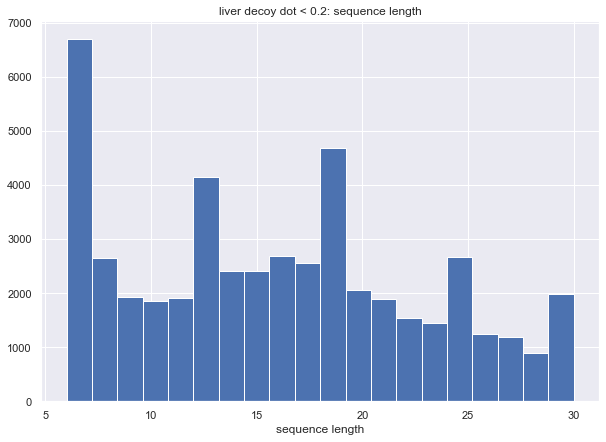

In [6]:
plt.figure(figsize = (10, 7))
plt.xlabel('sequence length')
plt.title('liver decoy dot < 0.2: sequence length')
seq_length = plt.hist(seq_len, bins = 20)

1.2000000000000002


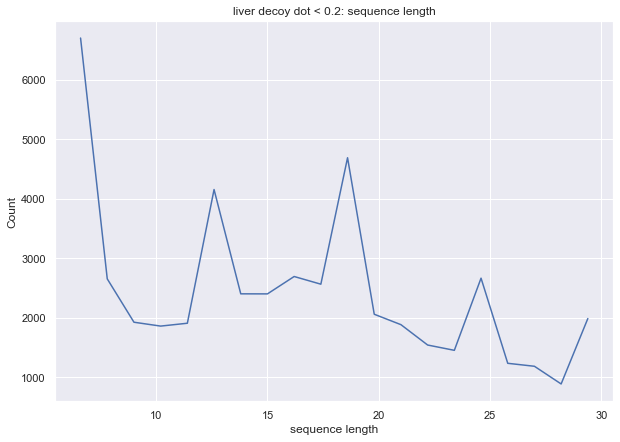

In [7]:
print(seq_length[1][1] - seq_length[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('sequence length')
plt.ylabel('Count')
plt.title('liver decoy dot < 0.2: sequence length')
plt.plot(seq_length[1][:-1] + 0.6, seq_length[0])
plt.show()

In [8]:
ch_state = []
for i in liverd1:
    ch_state.append(int(i[-1]))
ch_state

[2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 4,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 4,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 4,
 3,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 3,
 3,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 4,
 2,
 3,
 4,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 4,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 4,
 4,
 2,
 2,
 3,
 2,
 2,
 4,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 4,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 3,


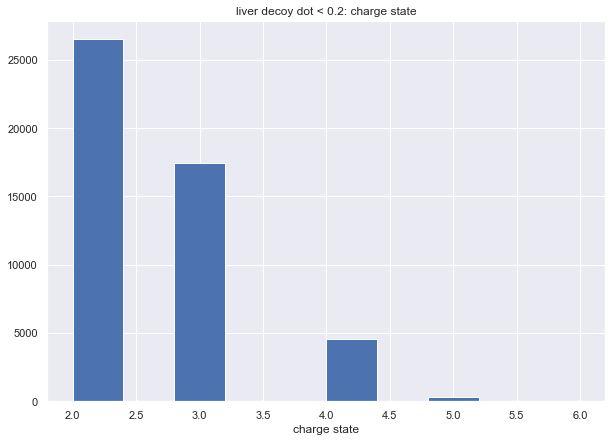

In [9]:
plt.figure(figsize = (10, 7))
plt.title('liver decoy dot < 0.2: charge state')
plt.xlabel('charge state')
charge_state = plt.hist(ch_state, bins = 10)

In [10]:
c_term = []
for i in liverd1:
    c_term.append(i[-3])
c_term

['K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'R',
 'K',
 'R',
 'K',
 'R',
 'R',
 'K',
 'K',
 'R',
 'K',
 'R',
 'R',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'R',
 'R',
 'R',
 'K',
 'H',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'K',
 'K',
 'R',
 'R',
 'R',
 'R',
 'K',
 'R',
 'R',
 'K',
 'K',
 'R',
 'K',
 'R',
 'H',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'R',
 'R',
 'R',
 'R',
 'K',
 'R',
 'R',
 'R',
 'R',
 'K',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'R',
 'R',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'R',
 'R',
 'R',
 'K',
 'R',
 'K',
 'R',
 'K',
 'R',
 'R'

In [11]:
counter1 = Counter(c_term)
counter1

Counter({'K': 26144,
         'R': 22390,
         'H': 37,
         'Y': 23,
         'N': 14,
         'E': 48,
         'D': 23,
         'F': 18,
         'A': 14,
         'V': 23,
         'M': 7,
         'L': 34,
         'S': 49,
         'Q': 14,
         'I': 13,
         'P': 6,
         'T': 7,
         'W': 1})

<function matplotlib.pyplot.show(close=None, block=None)>

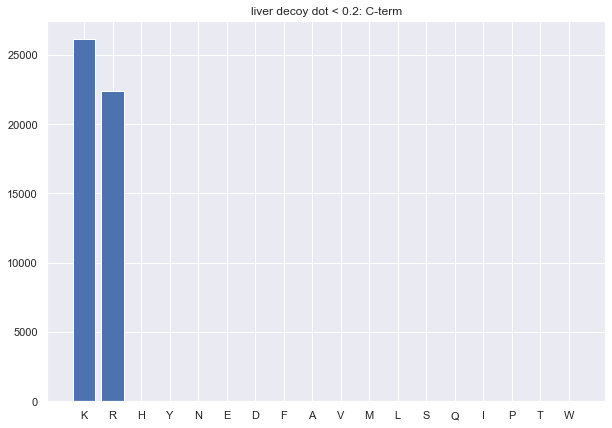

In [12]:
plt.figure(figsize = (10, 7))
plt.title('liver decoy dot < 0.2: C-term')
plt.bar(counter1.keys(), counter1.values())
plt.show

In [13]:
seq = []
for i in liverd1:
    seq.append(i[:-2])
seq

['TGGSTVLVVRK',
 'EFVSEQAQALMMK',
 'FVTSFVVTVK',
 'SNASEYMDGEVKR',
 'EASVVLILVK',
 'LAAVQLLITTK',
 'YPGYSSSQGSGSGHR',
 'YAVPLHQIGK',
 'LLVTSLISFLR',
 'IALLLFPKK',
 'ELQTLINHVVR',
 'VLNHLNQALIK',
 'AGLLALEVAVR',
 'SNASEYMDGEVKR',
 'IEGIGVNIKK',
 'LLGGLEAAQGTK',
 'AAIHLAPLRVR',
 'GLLVISNLVK',
 'IGLQALEVIR',
 'TPQLGVAEGIR',
 'AGLLALEVAVR',
 'FINLVPLIQK',
 'EASVVLILVK',
 'PILTGLEKIK',
 'SPRESLPLMK',
 'IWPLFHSVK',
 'EIAELLVKR',
 'EASVVLILVK',
 'ALQLAQELTR',
 'LVAIEQVTIAK',
 'PGTILQTLVK',
 'PPVLLAARR',
 'IIITGLSGVFK',
 'EDPAADAK',
 'PEPRPELR',
 'SGAAGAQR',
 'LHFQHEYDR',
 'HNGAEIYMR',
 'SGFGGLK',
 'GDQADPSMSHSLRSH',
 'LGPQDWSYWPDR',
 'QSTPSVDVHQGSSDR',
 'LSSLEMYATSTSR',
 'DTQGYHSGQGQR',
 'SDGQGESGTHLR',
 'AFNDEGNHDPSR',
 'PAPLHPIIK',
 'GSAAINK',
 'PQHLSILVLR',
 'HSGPFQR',
 'ELHEEYHFHR',
 'QFGGGTR',
 'GHYYGGEYPTMEPGK',
 'EDWDEPKR',
 'LEPHIHR',
 'SFVGIKK',
 'GSFDGGMTHTK',
 'EKLAGEVTR',
 'NGYYDRDDVK',
 'AELPVIAR',
 'GHQGNPILHH',
 'GAESLTK',
 'GGVNIIK',
 'TLVAGGAK',
 'PAVPPGK',
 'SGHPVLVSK',
 'PT

In [14]:
amino_acid = []
for i in seq:
    for j in i:
        amino_acid.append(j)
amino_acid

['T',
 'G',
 'G',
 'S',
 'T',
 'V',
 'L',
 'V',
 'V',
 'R',
 'K',
 'E',
 'F',
 'V',
 'S',
 'E',
 'Q',
 'A',
 'Q',
 'A',
 'L',
 'M',
 'M',
 'K',
 'F',
 'V',
 'T',
 'S',
 'F',
 'V',
 'V',
 'T',
 'V',
 'K',
 'S',
 'N',
 'A',
 'S',
 'E',
 'Y',
 'M',
 'D',
 'G',
 'E',
 'V',
 'K',
 'R',
 'E',
 'A',
 'S',
 'V',
 'V',
 'L',
 'I',
 'L',
 'V',
 'K',
 'L',
 'A',
 'A',
 'V',
 'Q',
 'L',
 'L',
 'I',
 'T',
 'T',
 'K',
 'Y',
 'P',
 'G',
 'Y',
 'S',
 'S',
 'S',
 'Q',
 'G',
 'S',
 'G',
 'S',
 'G',
 'H',
 'R',
 'Y',
 'A',
 'V',
 'P',
 'L',
 'H',
 'Q',
 'I',
 'G',
 'K',
 'L',
 'L',
 'V',
 'T',
 'S',
 'L',
 'I',
 'S',
 'F',
 'L',
 'R',
 'I',
 'A',
 'L',
 'L',
 'L',
 'F',
 'P',
 'K',
 'K',
 'E',
 'L',
 'Q',
 'T',
 'L',
 'I',
 'N',
 'H',
 'V',
 'V',
 'R',
 'V',
 'L',
 'N',
 'H',
 'L',
 'N',
 'Q',
 'A',
 'L',
 'I',
 'K',
 'A',
 'G',
 'L',
 'L',
 'A',
 'L',
 'E',
 'V',
 'A',
 'V',
 'R',
 'S',
 'N',
 'A',
 'S',
 'E',
 'Y',
 'M',
 'D',
 'G',
 'E',
 'V',
 'K',
 'R',
 'I',
 'E',
 'G',
 'I',
 'G',
 'V',
 'N',
 'I'

In [21]:
counter2 = Counter(amino_acid)
sorted(counter2.items())

[('A', 59591),
 ('D', 55249),
 ('E', 76065),
 ('F', 28333),
 ('G', 55715),
 ('H', 22557),
 ('I', 30897),
 ('K', 37688),
 ('L', 65998),
 ('M', 16145),
 ('N', 30346),
 ('P', 52005),
 ('Q', 39459),
 ('R', 28785),
 ('S', 63214),
 ('T', 41388),
 ('V', 46259),
 ('W', 7751),
 ('Y', 23425)]

<function matplotlib.pyplot.show(close=None, block=None)>

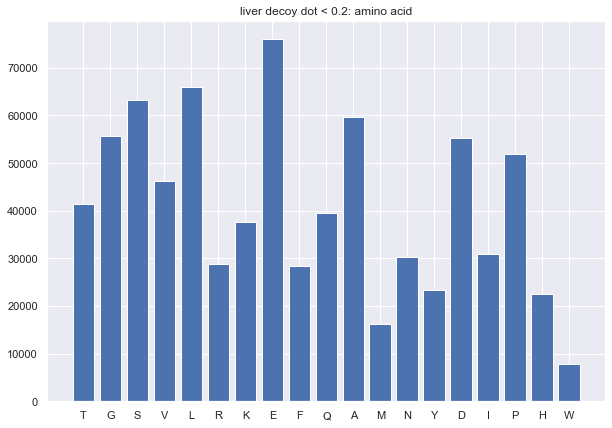

In [16]:
plt.figure(figsize = (10, 7))
plt.title('liver decoy dot < 0.2: amino acid')
plt.bar(counter2.keys(), counter2.values())
plt.show

In [17]:
liverD2 = liverD.loc[:, ['MzDiff']]
liverD2.head()

,MzDiff
0,0.000
1,-0.005
2,0.001
3,-0.003
4,-0.005


In [18]:
liverd2 = liverD2.values.tolist()
liverd2 = np.concatenate(liverd2).tolist()
liverd2

[0.0,
 -0.005,
 0.001,
 -0.003,
 -0.005,
 0.004,
 0.331,
 0.506,
 0.492,
 0.005,
 0.497,
 0.007,
 0.505,
 -0.003,
 0.008,
 0.5,
 -0.005,
 0.505,
 0.505,
 0.498,
 0.505,
 -0.004,
 -0.005,
 0.492,
 0.509,
 0.006,
 0.008,
 -0.005,
 0.0,
 0.004,
 0.506,
 0.498,
 0.502,
 0.5,
 0.006,
 0.004,
 -0.002,
 0.325,
 -0.004,
 0.007,
 0.003,
 -0.007,
 -0.01,
 0.329,
 0.336,
 -0.009,
 0.009,
 0.503,
 0.01,
 0.491,
 0.005,
 -0.003,
 0.34,
 0.337,
 0.008,
 0.495,
 -0.008,
 -0.007,
 -0.003,
 0.504,
 -0.005,
 -0.003,
 -0.001,
 0.001,
 0.497,
 0.501,
 0.502,
 -0.001,
 0.502,
 -0.01,
 0.507,
 0.002,
 -0.004,
 0.501,
 0.502,
 0.331,
 0.006,
 0.506,
 -0.005,
 -0.002,
 -0.002,
 0.339,
 0.001,
 0.327,
 0.332,
 0.504,
 0.326,
 -0.006,
 0.493,
 0.01,
 0.339,
 0.505,
 0.492,
 -0.008,
 0.246,
 0.004,
 0.508,
 -0.001,
 0.009,
 0.49,
 0.492,
 0.495,
 0.007,
 0.007,
 0.329,
 -0.007,
 0.497,
 0.002,
 0.498,
 -0.005,
 0.497,
 0.003,
 0.324,
 -0.002,
 0.009,
 -0.01,
 -0.006,
 0.0,
 0.505,
 0.337,
 0.324,
 -0.003,
 -0.00

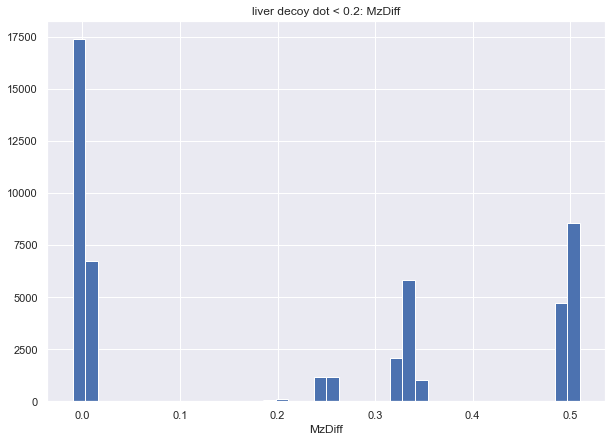

In [20]:
plt.figure(figsize = (10, 7))
plt.xlabel('MzDiff')
plt.title('liver decoy dot < 0.2: MzDiff')
MzDiff = plt.hist(liverd2, bins = 40)